# SENG 474 DATA MINING PROJECT
### By Cole Sibbald, Quinn Gieseke, and Keanelek Enns

Here we analyze the Adults data set using four data transformations and 8 classification algorithms

In [1]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

## EXTRACT AND VIEW DATA

In [2]:
#EXTRACT RAW TRAINING DATA
col_names = ['age',
             'workclass', 
             'fnlwgt', 
             'education', 
             'education-num', 
             'marital-status', 
             'occupation', 
             'relationship', 
             'race', 
             'sex', 
             'capital-gain', 
             'capital-loss', 
             'hours-per-week', 
             'native-country', 
             'class']

data_train = pd.read_csv('Adult/adult.data', 
                   delimiter = ",", 
                   header = None, 
                   names = col_names)

data_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## DATA VISUALIZATION: Histograms on raw data

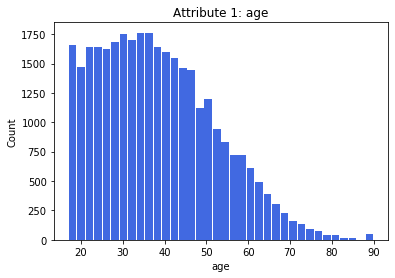

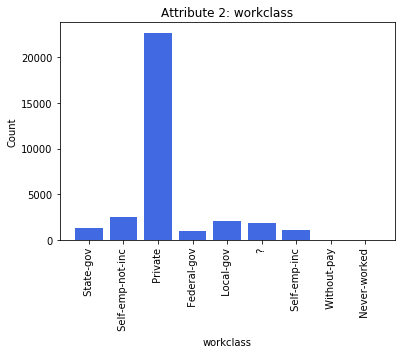

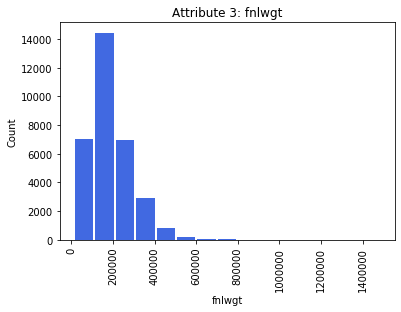

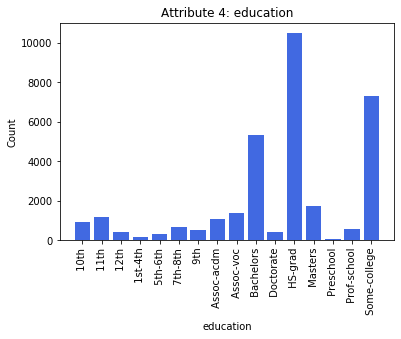

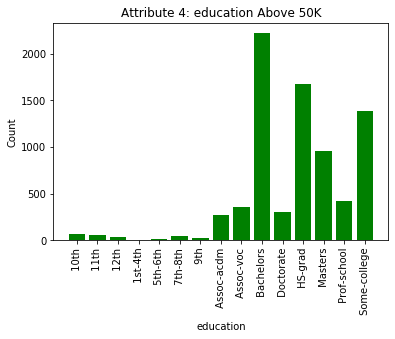

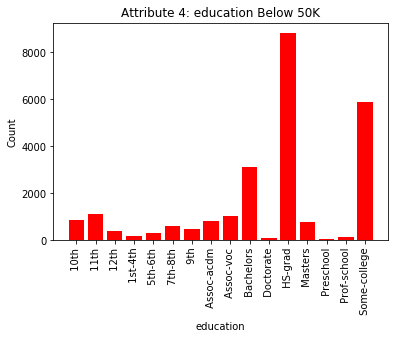

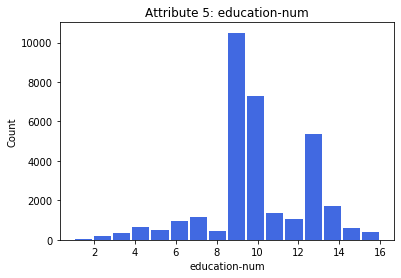

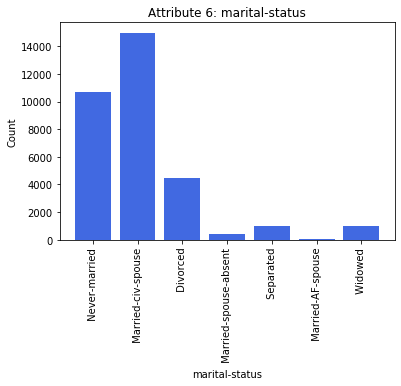

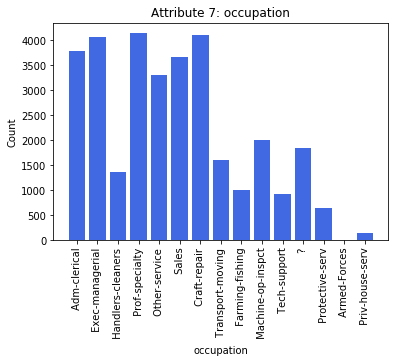

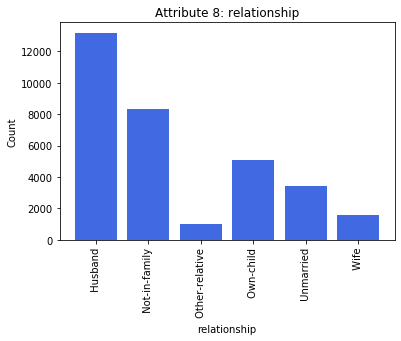

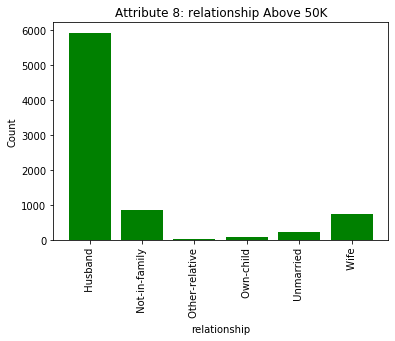

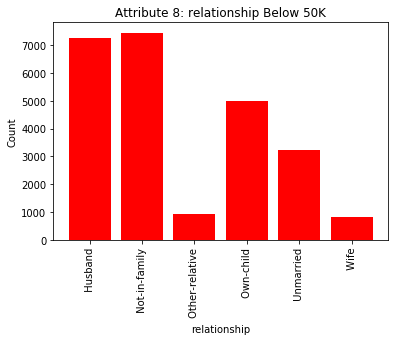

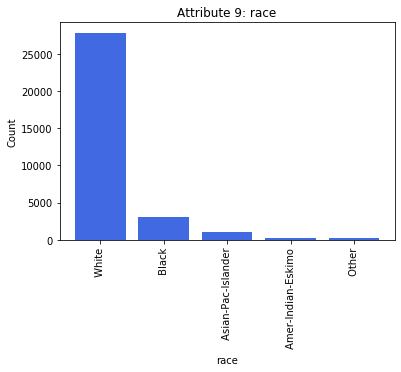

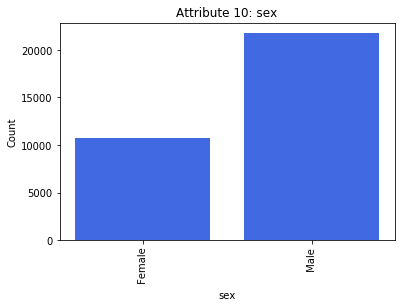

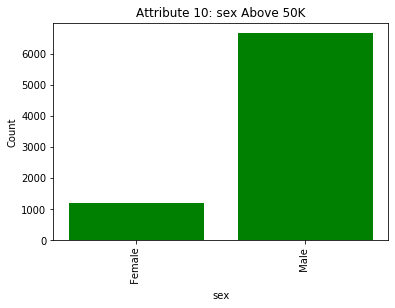

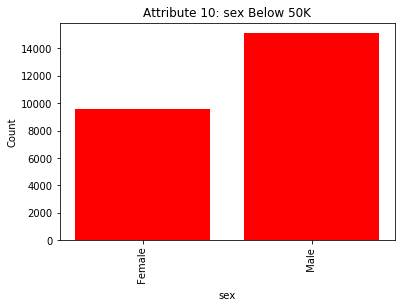

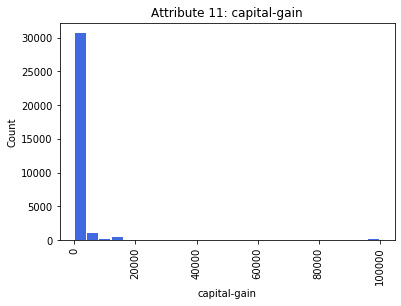

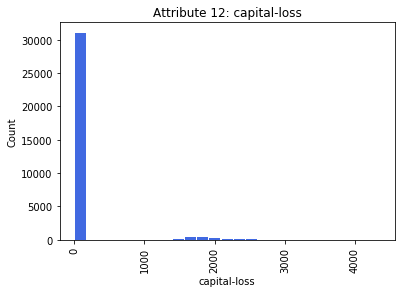

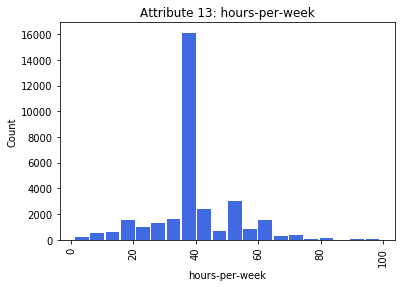

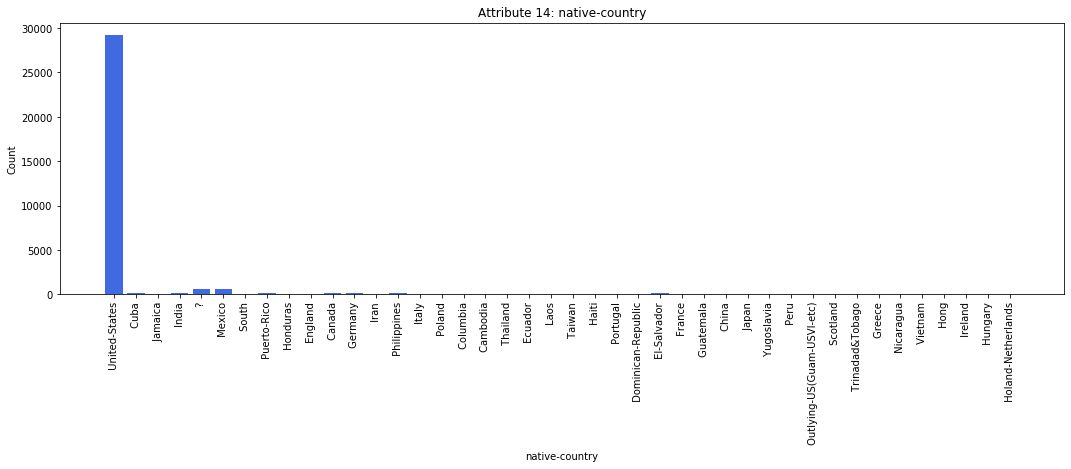

In [3]:
from collections import Counter
#AGE HISTOGRAM
attr = 0
attribute = pd.Series(data_train.iloc[:,attr].values )
fig = plt.figure()
distinct = set(data_train.iloc[:,attr].values)
attribute.plot.hist(bins=int(len(distinct)/2), rwidth=0.9,
                   color='royalblue')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show() 
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#WORKCLASS HISTOGRAM
attr = 1
freqs = Counter(data_train.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='royalblue')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#FNLWGT HISTOGRAM
attr = 2
attribute = pd.Series(data_train.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=15, rwidth=0.9,
                   color='royalblue')
plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show() 
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#EDUCATION HISTOGRAM
attr = 3

freqs = Counter(data_train.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='royalblue')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

above_50 = data_train.loc[data_train["class"].values == " >50K"]
freqs = Counter(above_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals,sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Above 50K'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}above.png'.format(attr),dpi=300, bbox_inches = "tight")

below_50 = data_train.loc[data_train["class"].values == " <=50K"]
freqs = Counter(below_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='r')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Below 50K'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}below.png'.format(attr),dpi=300, bbox_inches = "tight")

#EDUCATION-NUM HISTOGRAM
attr = 4
attribute = pd.Series(data_train.iloc[:,attr].values )
fig = plt.figure()
distinct = set(data_train.iloc[:,attr].values)
attribute.plot.hist(bins=len(distinct), rwidth=0.9,
                   color='royalblue')
#plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#MARITAL-STATUS HISTOGRAM
attr = 5
freqs = Counter(data_train.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='royalblue')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#OCCUPATION HISTOGRAM
attr = 6
freqs = Counter(data_train.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='royalblue')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#RELATIONSHIP HISTOGRAM
attr = 7
freqs = Counter(data_train.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals , color='royalblue')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

above_50 = data_train.loc[data_train["class"].values == " >50K"]
freqs = Counter(above_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals,sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Above 50K'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}above.png'.format(attr),dpi=300, bbox_inches = "tight")

below_50 = data_train.loc[data_train["class"].values == " <=50K"]
freqs = Counter(below_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='r')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Below 50K'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}below.png'.format(attr),dpi=300, bbox_inches = "tight")

#RACE HISTOGRAM
attr = 8
freqs = Counter(data_train.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='royalblue')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#SEX HISTOGRAM
attr = 9
freqs = Counter(data_train.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals , color='royalblue')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

above_50 = data_train.loc[data_train["class"].values == " >50K"]
freqs = Counter(above_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals,sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Above 50K'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}above.png'.format(attr),dpi=300, bbox_inches = "tight")

below_50 = data_train.loc[data_train["class"].values == " <=50K"]
freqs = Counter(below_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='r')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Below 50K'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}below.png'.format(attr),dpi=300, bbox_inches = "tight")

#CAPITAL-GAIN HISTOGRAM
attr = 10
attribute = pd.Series(data_train.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=25, rwidth=0.9,
                   color='royalblue')
plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#CAPTIAL-LOSS HISTOGRAM
attr = 11
attribute = pd.Series(data_train.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=25, rwidth=0.9,
                   color='royalblue')
plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#HOURS-PER-WEEK HISTOGRAM
attr = 12
attribute = pd.Series(data_train.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=20, rwidth=0.9,
                   color='royalblue')

plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

#NATIVE-COUNTRY HISTOGRAM
attr = 13
freqs = Counter(data_train.iloc[:,attr].values)

xvals = range(len(freqs.values()))
fig = plt.figure(figsize=(18, 5))
plt.bar(xvals, freqs.values(), color='royalblue')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, col_names[attr]))
plt.xlabel('{}'.format(col_names[attr]))
plt.ylabel('Count')
plt.show()
fig.savefig('images/{}.png'.format(attr),dpi=300, bbox_inches = "tight")

## DATA CLEANING/PROCESSING

In [4]:
#CONVERSION FUNCTIONS

def wcCon(wc):
    wcdict ={"Private":1, "Self-emp-not-inc":2, "Self-emp-inc":3, "Federal-gov":4, "Local-gov":5, "State-gov":6, "Without-pay":7, "Never-worked":8, "?":'?'}
    return wcdict[wc]
    
def eduCon(edu):
    edudict = {"Bachelors":1, "Some-college":2, "11th":3, "HS-grad":4, "Prof-school":5, "Assoc-acdm":6, "Assoc-voc":7, "9th":8, "7th-8th":9, "12th":10, "Masters":11, "1st-4th":12, "10th":13, "Doctorate":14, "5th-6th":15, "Preschool":16, "?":"?"}
    return edudict[edu]

def marCon(mar):
    mardict = {"Married-civ-spouse":1, "Divorced":2, "Never-married":3, "Separated":4, "Widowed":5, "Married-spouse-absent":6, "Married-AF-spouse":7,"?":"?"}
    return mardict[mar]

def ocCon(oc):
    ocdict = {"Tech-support":1, "Craft-repair":2, "Other-service":3, "Sales":4, "Exec-managerial":5, "Prof-specialty":6, "Handlers-cleaners":7, "Machine-op-inspct":8, "Adm-clerical":9, "Farming-fishing":10, "Transport-moving":11, "Priv-house-serv":12, "Protective-serv":13, "Armed-Forces":14, "?":"?"}
    return ocdict[oc]

def relCon(rel):
    reldict = {"Wife":1, "Own-child":2, "Husband":3, "Not-in-family":4, "Other-relative":5, "Unmarried":6, "?":"?"}
    return reldict[rel]

def raceCon(race):
    racedict = {"White":1, "Asian-Pac-Islander":2, "Amer-Indian-Eskimo":3, "Other":4, "Black":5, "?":"?"}
    return racedict[race]
    
def sexCon(sex):
    sexdict = {"Female":-1, "Male":1, "?":"?"}
    return sexdict[sex]
    
def cunCon(cun):
    cundict = {"United-States":1, "Cambodia":2, "England":3, "Puerto-Rico":4, "Canada":5, "Germany":6, "Outlying-US(Guam-USVI-etc)":7, "India":8, "Japan":9, "Greece":10, "South":11, "China":12, "Cuba":13, "Iran":14, "Honduras":15, "Philippines":16, "Italy":17, "Poland":18, "Jamaica":19, "Vietnam":20, "Mexico":21, "Portugal":22, "Ireland":23, "France":24, "Dominican-Republic":25, "Laos":26, "Ecuador":27, "Taiwan":28, "Haiti":29, "Columbia":30, "Hungary":31, "Guatemala":32, "Nicaragua":33, "Scotland":34, "Thailand":35, "Yugoslavia":36, "El-Salvador":37, "Trinadad&Tobago":38, "Peru":39, "Hong":40, "Holand-Netherlands":41, "?":"?"}
    return cundict[cun]
    
def salKhan(sal):
    saldict = {">50K.":-1, "<=50K.":1}
    return saldict[sal]


#TEST DATA
f = open("Adult/adult.test", 'r')

#CONVERT ORIGINAL TEST DATA INTO NUMERICS AND REMOVE ROWS WITH '?'
datnames=np.array(("Age", "Workclass", "fnlwgt", "Education", "Education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"))

data = pd.read_csv(f, delimiter=", ", header=None, names = datnames, na_values='?', engine='python', converters={"Workclass":wcCon, "Education":eduCon, "marital-status":marCon, "occupation":ocCon, "relationship":relCon, "race":raceCon, "sex":sexCon, "native-country":cunCon, "salary":salKhan})
data = data.dropna()

test_orig = data.copy()

#STANDARDIZE THE DATA FROM THE ORIGINAL
test_stand = data.copy()
for feature in ("Age", "Workclass", "fnlwgt", "Education", "Education-num", "marital-status", "occupation", "relationship", "race", "capital-gain", "capital-loss", "hours-per-week", "native-country"):
    test_stand[feature] = (data[feature] - data[feature].mean())/(data[feature].std())

#DROP UNNECESSARY FEATURES BASED ON RESULTS OF feature_select.Rmd
test_feat = data.drop(["Workclass", "fnlwgt", "race", "occupation", "capital-loss", "capital-gain", "native-country"], axis=1)

#PERFORM PRINCIPLE COMPONENT ANALYSIS ON DATA
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
test_PCA = np.hstack((pca.fit_transform(test_stand.drop("salary", axis=1)), np.array(data["salary"]).reshape((-1,1))))
test_PCA = pd.DataFrame(test_PCA)


#TRAIN DATA
f2 = open("Adult/adult.data", 'r')
def salKhan(sal):
    saldict = {">50K":-1, "<=50K":1}
    return saldict[sal]

#CONVERT ORIGINAL TRAIN DATA INTO NUMERICS AND REMOVE ROWS WITH '?'
data = pd.read_csv(f2,  delimiter=", ",engine='python', names=datnames, na_values='?', converters={"Workclass":wcCon, "Education":eduCon, "marital-status":marCon, "occupation":ocCon, "relationship":relCon, "race":raceCon, "sex":sexCon, "native-country":cunCon, "salary":salKhan})
data = data.dropna()
train_orig = data.copy()

#STANDARDIZE THE DATA FROM THE ORIGINAL
train_stand = data.copy()
for feature in ("Age", "Workclass", "fnlwgt", "Education", "Education-num", "marital-status", "occupation", "relationship", "race", "capital-gain", "capital-loss", "hours-per-week", "native-country"):
    train_stand[feature] = (data[feature] - data[feature].mean())/(data[feature].std())
    
#DROP UNNECESSARY FEATURES BASED ON RESULTS OF feature_select.Rmd
train_feat = data.drop(["Workclass", "fnlwgt", "race", "occupation", "capital-loss", "capital-gain", "native-country"], axis=1)

#PERFORM PRINCIPLE COMPONENT ANALYSIS ON DATA
pca = PCA(n_components = 5)
train_PCA = np.hstack((pca.fit_transform(train_stand.drop("salary", axis=1)), np.array(data["salary"]).reshape((-1,1))))
train_PCA = pd.DataFrame(train_PCA)

### Create Class Arrays for train and test data (ys)

In [5]:
# y_train is the class array which is used for all training data sets (not affected by data transformations)
y_train = train_orig.iloc[:,-1:].values
# flatten
y_train = np.ravel(y_train)

# Similarly we make a y_test array to evaluate the accuracy of our predictions against
y_test = test_orig.iloc[:,-1:].values
y_test = np.ravel(y_test)

### Create Attribute Matrices for train and test data (Xs)

In [6]:
# ORIGINAL DATA
X_train_orig = train_orig.iloc[:,0:-1].values   
X_test_orig = test_orig.iloc[:,0:-1].values

In [7]:
# STANDARDIZED DATA
X_train_stand = train_stand.iloc[:,0:-1].values
X_test_stand = test_stand.iloc[:,0:-1].values

In [8]:
# FEATURE ENGINEERED DATA
X_train_feat = train_feat.iloc[:,0:-1].values
X_test_feat = test_feat.iloc[:,0:-1].values

In [9]:
# PCA DATA
X_train_PCA = train_PCA.iloc[:,0:-1].values
X_test_PCA = test_PCA.iloc[:,0:-1].values

# RESULTING SHAPES
# print(X_train_orig.shape)
# print(X_train_stand.shape)
# print(X_train_feat.shape)
# print(X_train_PCA.shape)
# print(y_train.shape)
# print(X_test_orig.shape)
# print(X_test_stand.shape)
# print(X_test_feat.shape)
# print(X_test_PCA.shape)
# print(y_test.shape)

## RUN ALGORITHMS

### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#ORIGINAL DATA
nb.fit(X_train_orig, y_train)

y_orig_nb = nb.predict(X_test_orig)

nb_orig_fpr, nb_orig_tpr, _ = roc_curve(y_test, nb.predict_proba(X_test_orig)[:,1])

#STANDARDIZED DATA
nb.fit(X_train_stand, y_train)

y_stand_nb = nb.predict(X_test_stand)

nb_stand_fpr, nb_stand_tpr, _ = roc_curve(y_test, nb.predict_proba(X_test_stand)[:,1])

#FEATURE SELECTED DATA
nb.fit(X_train_feat, y_train)

y_feat_nb = nb.predict(X_test_feat)

nb_feat_fpr, nb_feat_tpr, _ = roc_curve(y_test, nb.predict_proba(X_test_feat)[:,1])

#PCA DATA
nb.fit(X_train_PCA, y_train)

y_PCA_nb = nb.predict(X_test_PCA)

nb_PCA_fpr, nb_PCA_tpr, _ = roc_curve(y_test, nb.predict_proba(X_test_PCA)[:,1])

### Logistical Regression

In [11]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='lbfgs')

#ORIGINAL DATA
log.fit(X_train_orig, y_train)

y_orig_log = log.predict(X_test_orig)

log_orig_fpr, log_orig_tpr,_ = roc_curve(y_test, log.decision_function(X_test_orig))


#STANDARDIZED DATA
log.fit(X_train_stand, y_train)

y_stand_log = log.predict(X_test_stand)

log_stand_fpr, log_stand_tpr,_ = roc_curve(y_test, log.decision_function(X_test_stand))

#FEATURE SELECTED DATA
log.fit(X_train_feat, y_train)

y_feat_log = log.predict(X_test_feat)

log_feat_fpr, log_feat_tpr,_ = roc_curve(y_test, log.decision_function(X_test_feat))

#PCA DATA
log.fit(X_train_PCA, y_train)

y_PCA_log = log.predict(X_test_PCA)

log_PCA_fpr, log_PCA_tpr,_ = roc_curve(y_test, log.decision_function(X_test_PCA))

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

#ORIGINAL DATA
lin.fit(X_train_orig, y_train)

y_orig_lin = lin.predict(X_test_orig)

y_idx = np.where(y_orig_lin < 0)
y_orig_lin[y_idx] = -1

y_idx = np.where(y_orig_lin >= 0)
y_orig_lin[y_idx] = 1

#STANDARDIZED DATA
lin.fit(X_train_stand, y_train)

y_stand_lin = lin.predict(X_test_stand)

y_idx = np.where(y_stand_lin < 0)
y_stand_lin[y_idx] = -1

y_idx = np.where(y_stand_lin >= 0)
y_stand_lin[y_idx] = 1

#FEATURE SELECTED DATA
lin.fit(X_train_feat, y_train)

y_feat_lin = lin.predict(X_test_feat)

y_idx = np.where(y_feat_lin < 0)
y_feat_lin[y_idx] = -1

y_idx = np.where(y_feat_lin >= 0)
y_feat_lin[y_idx] = 1

#PCA DATA
lin.fit(X_train_PCA, y_train)

y_PCA_lin = lin.predict(X_test_PCA)

y_idx = np.where(y_PCA_lin < 0)
y_PCA_lin[y_idx] = -1

y_idx = np.where(y_PCA_lin >= 0)
y_PCA_lin[y_idx] = 1

### Support Vector Machine

In [13]:
# The following svm function performed poorly with the given data set size being above 10,000 instances
# We discuss this in the report, and suggest not running this cell as it will take some time.
# From scikit-learn: "The fit time scales at least quadratically with the number of samples
# and may be impractical beyond tens of thousands of samples."
# We attempted to use the linear model, but the data is not linearly separable, so it does not converge

from sklearn import svm as support_vector_machine
svm = support_vector_machine.SVC(gamma='scale')

#ORIGINAL DATA
svm.fit(X_train_orig, y_train)

y_orig_svm = svm.predict(X_test_orig)

#STANDARDIZED DATA
svm.fit(X_train_stand, y_train)

y_stand_svm = svm.predict(X_test_stand)

#FEATURE SELECTED DATA
svm.fit(X_train_feat, y_train)

y_feat_svm = svm.predict(X_test_feat)

#PCA DATA
svm.fit(X_train_PCA, y_train)

y_PCA_svm = svm.predict(X_test_PCA)

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

#ORIGINAL DATA
tree.fit(X_train_orig, y_train)

y_orig_tree = tree.predict(X_test_orig)

#STANDARDIZED DATA
tree.fit(X_train_stand, y_train)

y_stand_tree = tree.predict(X_test_stand)

#FEATURE SELECTED DATA
tree.fit(X_train_feat, y_train)

y_feat_tree = tree.predict(X_test_feat)

#PCA DATA
tree.fit(X_train_PCA, y_train)

y_PCA_tree = tree.predict(X_test_PCA)

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)

#ORIGINAL DATA
rf.fit(X_train_orig, y_train)

y_orig_rf = rf.predict(X_test_orig)

#STANDARDIZED DATA
rf.fit(X_train_stand, y_train)

y_stand_rf = rf.predict(X_test_stand)

#FEATURE SELECTED DATA
rf.fit(X_train_feat, y_train)

y_feat_rf = rf.predict(X_test_feat)

#PCA DATA
rf.fit(X_train_PCA, y_train)

y_PCA_rf = rf.predict(X_test_PCA)

### K-Means

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0,max_iter=1000)

#ORIGINAL DATA
km.fit(X_train_orig)

y_orig_km = km.predict(X_test_orig)

y_idx = np.where(y_orig_km == 0)
y_orig_km[y_idx] = -1

#STANDARDIZED DATA
km.fit(X_train_stand)

y_stand_km = km.predict(X_test_stand)

y_idx = np.where(y_stand_km == 0)
y_stand_km[y_idx] = -1

#FEATURE SELECTED DATA
km.fit(X_train_feat)

y_feat_km = km.predict(X_test_feat)

y_idx = np.where(y_feat_km == 0)
y_feat_km[y_idx] = -1

#PCA DATA
km.fit(X_train_PCA)

y_PCA_km = km.predict(X_test_PCA)

y_idx = np.where(y_PCA_km == 0)
y_PCA_km[y_idx] = -1

### Ensemble

In [17]:
#Take a vote between the 7 other classifications

#ORIGINAL DATA
y_orig_ensemble = np.stack((y_orig_nb,
                            y_orig_log,
                            y_orig_lin,
                            y_orig_svm,
                            y_orig_tree,
                            y_orig_rf,
                            y_orig_km))

y_orig_ensemble = np.sum(y_orig_ensemble, axis=0)

y_idx = np.where(y_orig_ensemble < 0)
y_orig_ensemble[y_idx] = -1

y_idx = np.where(y_orig_ensemble >= 0)
y_orig_ensemble[y_idx] = 1

#STANDARDIZED DATA
y_stand_ensemble = np.stack((y_stand_nb,
                             y_stand_log,
                             y_stand_lin,
                             y_stand_svm,
                             y_stand_tree,
                             y_stand_rf,
                             y_stand_km))

y_stand_ensemble = np.sum(y_stand_ensemble, axis=0)

y_idx = np.where(y_stand_ensemble < 0)
y_stand_ensemble[y_idx] = -1

y_idx = np.where(y_stand_ensemble >= 0)
y_stand_ensemble[y_idx] = 1

#FEATURE SELECTED DATA
y_feat_ensemble = np.stack((y_feat_nb,
                             y_feat_log,
                             y_feat_lin,
                             y_feat_svm,
                             y_feat_tree,
                             y_feat_rf,
                             y_feat_km))

y_feat_ensemble = np.sum(y_feat_ensemble, axis=0)

y_idx = np.where(y_feat_ensemble < 0)
y_feat_ensemble[y_idx] = -1

y_idx = np.where(y_feat_ensemble >= 0)
y_feat_ensemble[y_idx] = 1

#PCA DATA
y_PCA_ensemble = np.stack((y_PCA_nb,
                             y_PCA_log,
                             y_PCA_lin,
                             y_PCA_svm,
                             y_PCA_tree,
                             y_PCA_rf,
                             y_PCA_km))

y_PCA_ensemble = np.sum(y_PCA_ensemble, axis=0)

y_idx = np.where(y_PCA_ensemble < 0)
y_PCA_ensemble[y_idx] = -1

y_idx = np.where(y_PCA_ensemble >= 0)
y_PCA_ensemble[y_idx] = 1

## RESULTS

In [18]:
# make_confusion_matrix taken from cf_matrix.py at https://github.com/DTrimarchi10/confusion_matrix
from cf_matrix import make_confusion_matrix
from sklearn import metrics

### Naive Bayes

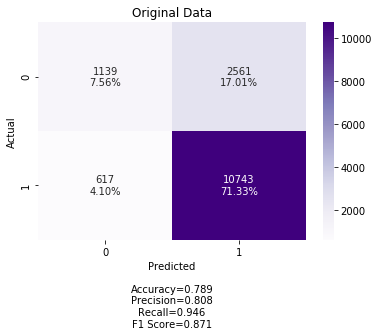

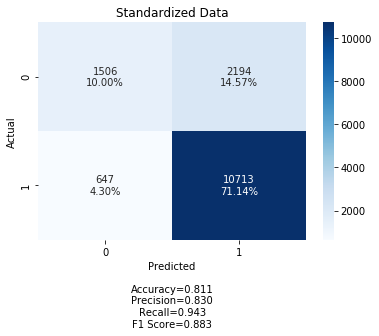

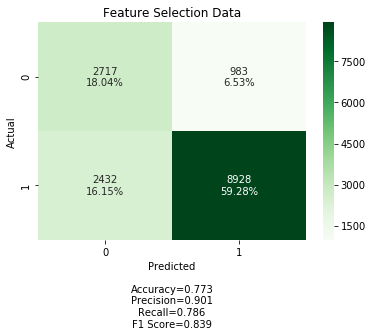

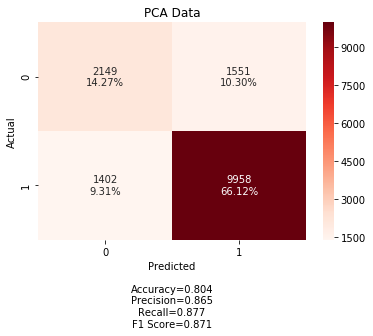

In [19]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_nb),cmap='Purples',title="Original Data",img_name='cf1')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_nb),cmap='Blues',title="Standardized Data",img_name='cf2')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_nb),cmap='Greens',title="Feature Selection Data",img_name='cf3')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_nb),cmap='Reds',title="PCA Data",img_name='cf4')

### Logistical Regression

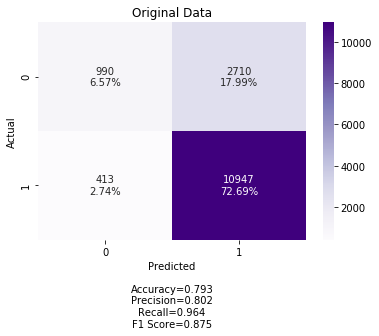

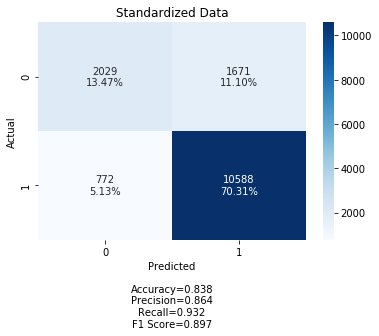

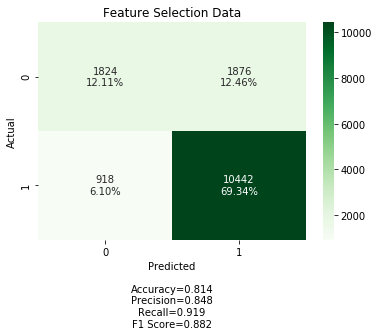

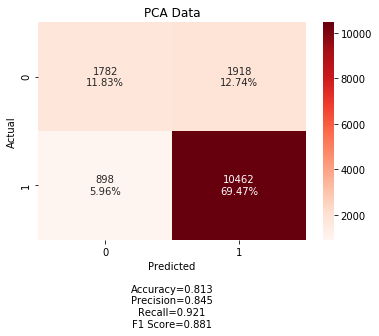

In [20]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_log),cmap='Purples',title="Original Data",img_name='cf5')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_log),cmap='Blues',title="Standardized Data",img_name='cf6')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_log),cmap='Greens',title="Feature Selection Data",img_name='cf7')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_log),cmap='Reds',title="PCA Data",img_name='cf8')

### Linear Regression

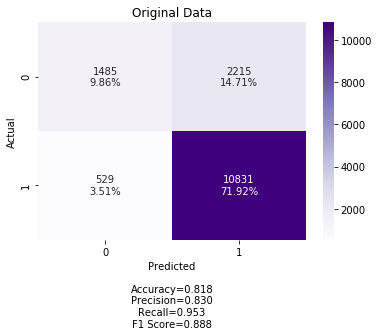

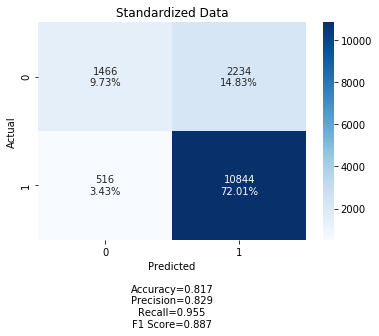

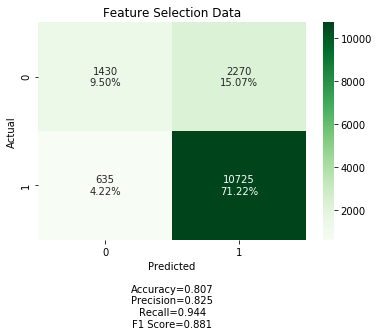

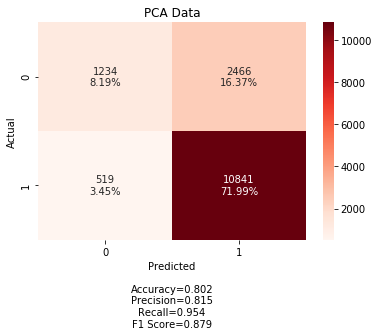

In [21]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_lin),cmap='Purples',title="Original Data",img_name='cf9')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_lin),cmap='Blues',title="Standardized Data",img_name='cf10')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_lin),cmap='Greens',title="Feature Selection Data",img_name='cf11')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_lin),cmap='Reds',title="PCA Data",img_name='cf12')

### Support Vector Machine

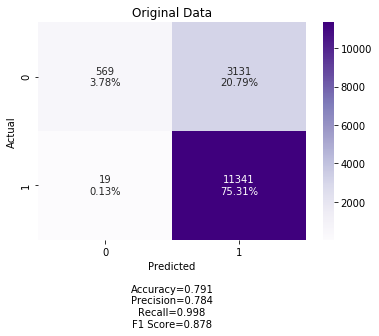

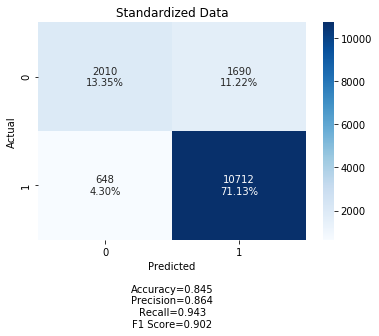

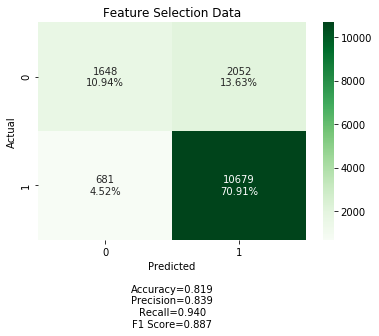

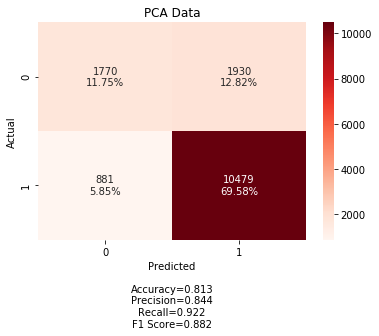

In [22]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_svm),cmap='Purples',title="Original Data",img_name='cf13')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_svm),cmap='Blues',title="Standardized Data",img_name='cf14')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_svm),cmap='Greens',title="Feature Selection Data",img_name='cf15')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_svm),cmap='Reds',title="PCA Data",img_name='cf16')

### Decision Tree

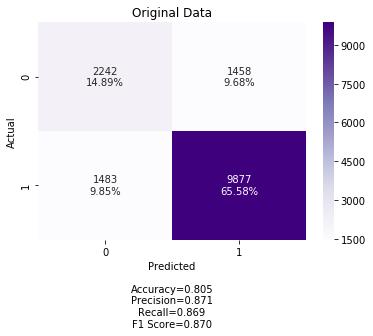

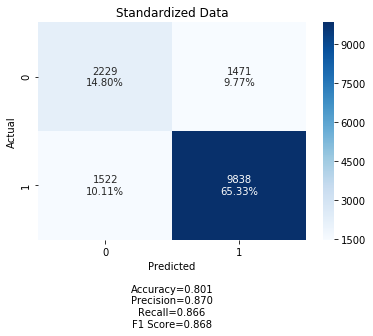

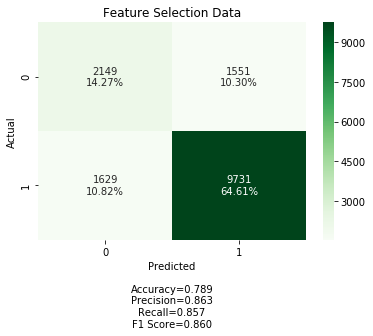

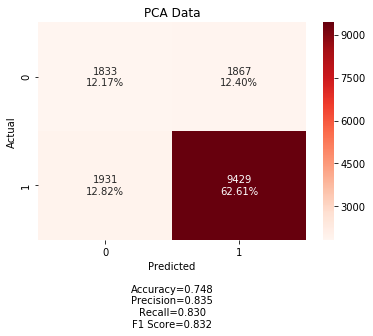

In [23]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_tree),cmap='Purples',title="Original Data",img_name='cf17')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_tree),cmap='Blues',title="Standardized Data",img_name='cf18')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_tree),cmap='Greens',title="Feature Selection Data",img_name='cf19')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_tree),cmap='Reds',title="PCA Data",img_name='cf20')

### Random Forest

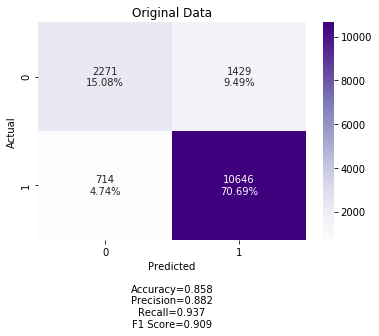

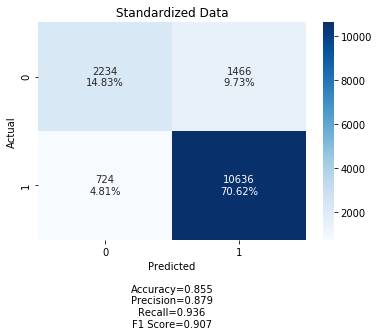

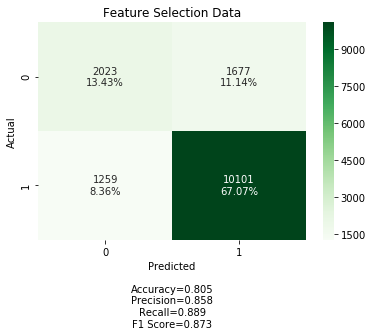

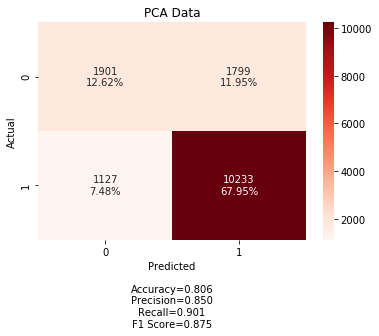

In [24]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_rf),cmap='Purples',title="Original Data",img_name='cf21')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_rf),cmap='Blues',title="Standardized Data",img_name='cf22')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_rf),cmap='Greens',title="Feature Selection Data",img_name='cf23')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_rf),cmap='Reds',title="PCA Data",img_name='cf24')

### K Means

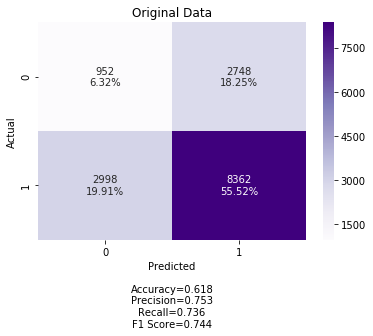

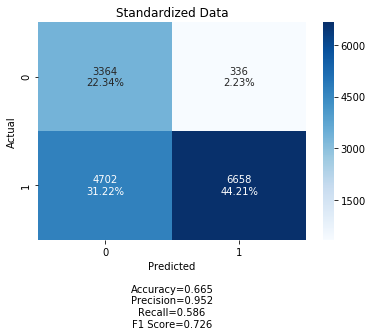

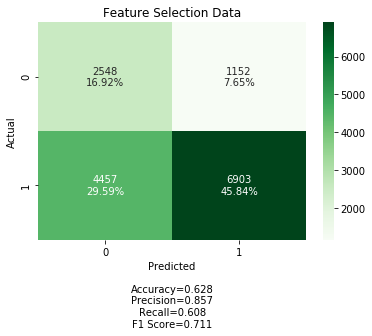

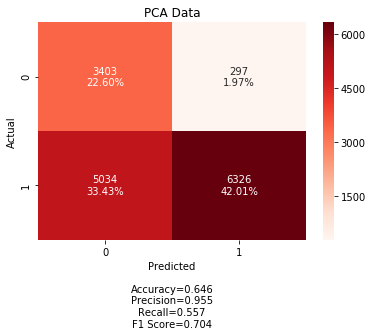

In [25]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_km),cmap='Purples',title="Original Data",img_name='cf25')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_km),cmap='Blues',title="Standardized Data",img_name='cf26')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_km),cmap='Greens',title="Feature Selection Data",img_name='cf27')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_km),cmap='Reds',title="PCA Data",img_name='cf28')

### Ensemble

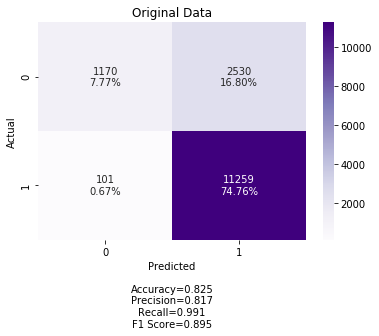

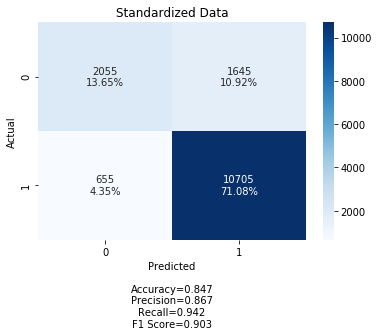

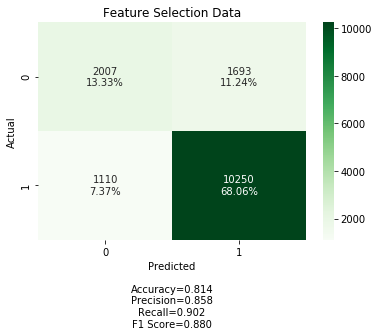

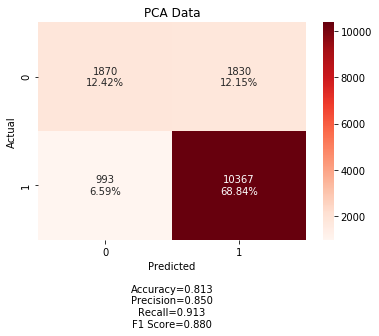

In [26]:
make_confusion_matrix(metrics.confusion_matrix(y_test, y_orig_ensemble),cmap='Purples',title="Original Data",img_name='cf29')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_stand_ensemble),cmap='Blues',title="Standardized Data",img_name='cf30')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_feat_ensemble),cmap='Greens',title="Feature Selection Data",img_name='cf31')
make_confusion_matrix(metrics.confusion_matrix(y_test, y_PCA_ensemble),cmap='Reds',title="PCA Data",img_name='cf32')

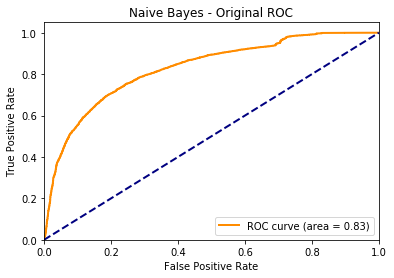

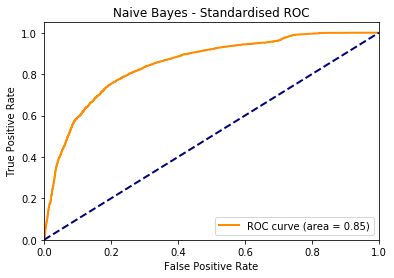

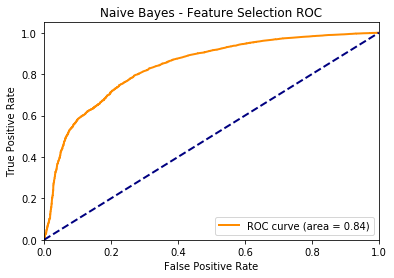

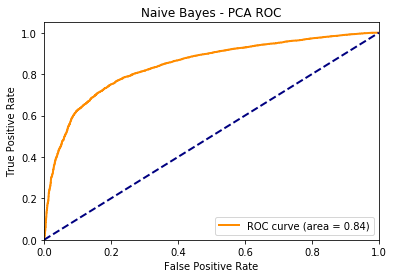

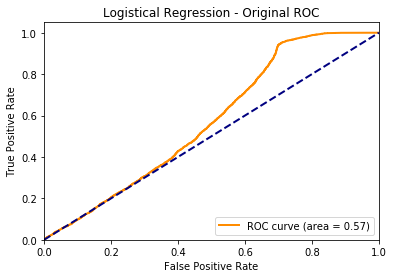

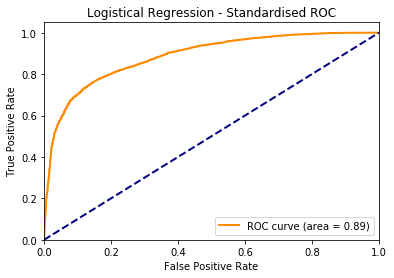

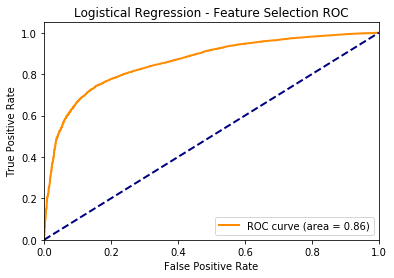

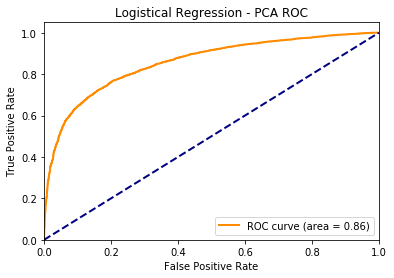

In [27]:
#What ROC curves I can make


def plot_ROC(fpr, tpr, classifier,img_name):
    f_auc = auc(fpr, tpr)
    fig = plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % f_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(classifier + ' ROC')
    plt.legend(loc="lower right")
    plt.show()
    fig.savefig('images/{}.png'.format(img_name),dpi=300, bbox_inches = "tight")


plot_ROC(nb_orig_fpr, nb_orig_tpr, "Naive Bayes - Original","roc1")
plot_ROC(nb_stand_fpr, nb_stand_tpr, "Naive Bayes - Standardised","roc2")
plot_ROC(nb_feat_fpr, nb_feat_tpr, "Naive Bayes - Feature Selection","roc3")
plot_ROC(nb_PCA_fpr, nb_PCA_tpr, "Naive Bayes - PCA","roc4")


plot_ROC(log_orig_fpr, log_orig_tpr, "Logistical Regression - Original","roc5")
plot_ROC(log_stand_fpr, log_stand_tpr, "Logistical Regression - Standardised","roc6")
plot_ROC(log_feat_fpr, log_feat_tpr, "Logistical Regression - Feature Selection","roc7")
plot_ROC(log_PCA_fpr, log_PCA_tpr, "Logistical Regression - PCA","roc8")